In [1]:
#Librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas_summary import DataFrameSummary

### View of the Dataset

In [2]:
df_train = pd.read_csv(r"C:\Users\Usuario\Documents\Entrega_ML\data\raw\Health_index1.csv")

data_summary = DataFrameSummary(df_train)
data_summary.columns_stats.T
# data.info()

,counts,uniques,missing,missing_perc,types
Hydrogen,470,111,0,0%,numeric
Oxigen,470,382,0,0%,numeric
Nitrogen,470,317,0,0%,numeric
Methane,470,74,0,0%,numeric
CO,470,298,0,0%,numeric
CO2,470,374,0,0%,numeric
Ethylene,470,61,0,0%,numeric
Ethane,470,141,0,0%,numeric
Acethylene,470,26,0,0%,numeric
DBDS,470,57,0,0%,numeric


In [3]:
df_train.head(5)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


In [4]:
df_train.rename(columns={'Oxigen': 'O2', 'Nitrogen':'N2','Hydrogen':'H2', 'Methane':'CH4', 'Acethylene':'C2H2', 'Ethylene':'C2H4', 'Ethane':'C2H6'}, inplace=True)
df_train.head(5)

,H2,O2,N2,CH4,CO,CO2,C2H4,C2H6,C2H2,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0


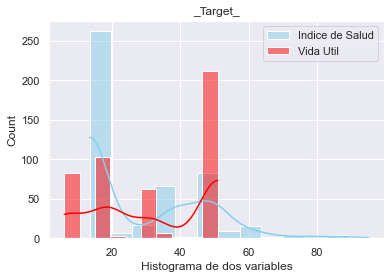

In [5]:
# Represento el histograma
 
sns.set(style="darkgrid")

sns.histplot(data=df_train, x="Health index", color="skyblue", label="Indice de Salud", kde=True)
sns.histplot(data=df_train, x="Life expectation", color="red", label="Vida Util", kde=True)
# sns.distplot(data["Health index"])
# sns.distplot(data["Life expectation"])

plt.legend() 
plt.title('_Target_')
plt.xlabel('Histograma de dos variables')
plt.show()

<AxesSubplot:xlabel='Life expectation', ylabel='Health index'>

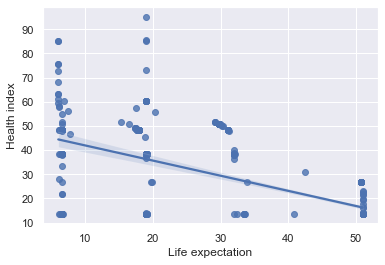

In [6]:
#I use the function regplot to make a scatterplot
sns.regplot(x=df_train["Life expectation"], y=df_train["Health index"])

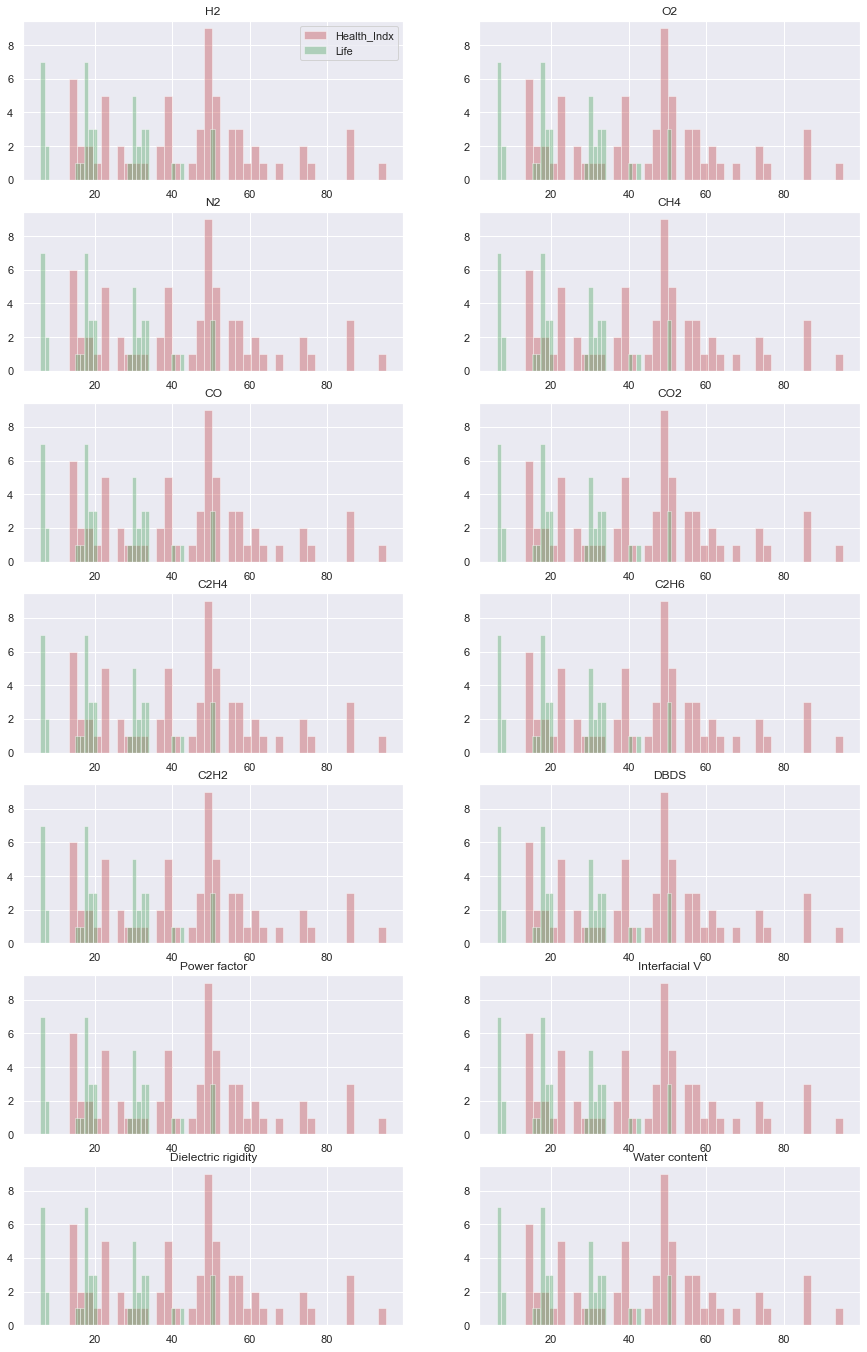

In [7]:
fig, axes = plt.subplots(7,2, figsize=(15,24))
Health_Indx = df_train['Health index']
Life = df_train['Life expectation']
axes = axes.ravel()
for i in range(len(df_train.columns[:14])):
    axes[i].hist(Health_Indx.unique(), bins = 40, color='r',alpha=0.4)
    axes[i].hist(Life.unique(),bins = 40, color='g',alpha=0.4)
    axes[i].set_title(df_train.columns[i])

axes[0].legend(['Health_Indx','Life']);

<AxesSubplot:>

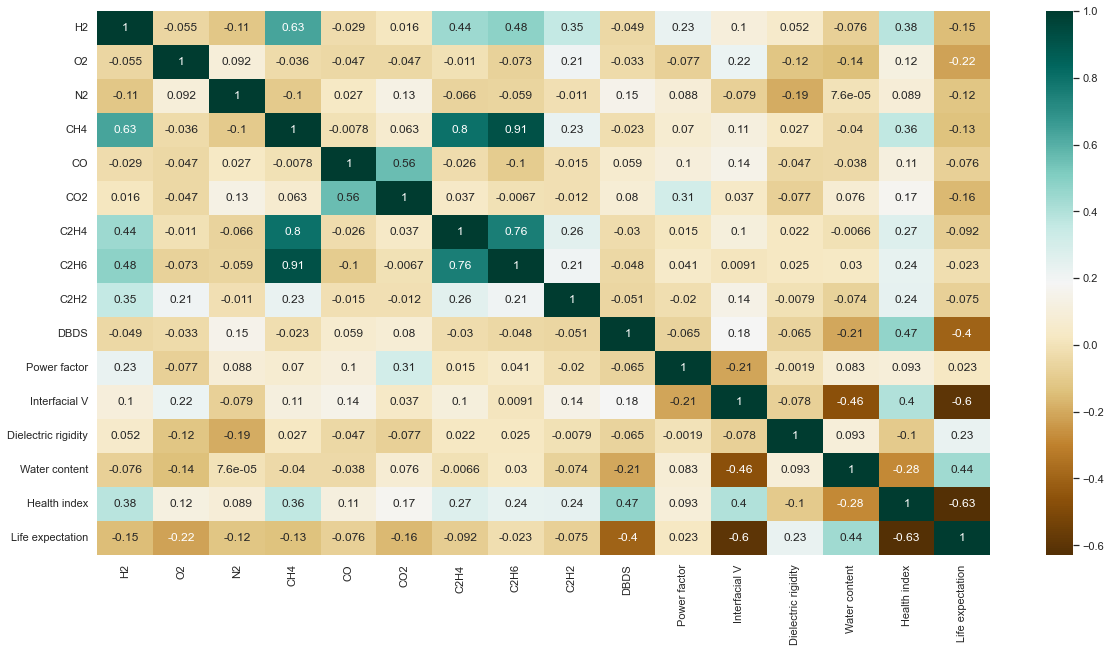

In [8]:
plt.figure(figsize=(20,10))
c = df_train.corr()
sns.heatmap(c, cmap='BrBG', annot=True)

In [9]:
print(df_train['Life expectation'].min())
print(df_train['Life expectation'].mean())
print(df_train['Life expectation'].max())

6.0
33.0104255319149
51.0


### Feature Engineering. (Part 3)

Los valores de concentraciones de gases, según Reyes (2010), se miden en partes por millón (p.p.m.), 1 ml/1000 ml, y se comparan con los valores patrones mostrados a continuación. Si alguna de las concentraciones excede el doble del valor patrón y una de las concentraciones de los demás gases excede el límite mostrado, el transformador puede considerarse
defectuoso.

GASES DISUELTOS P.P.M.
- Hidrógeno (H2) 100
- Metano (CH4) 120
- Acetileno (C2H2) 35
- Etileno (C2H4) 30
- Etano (C2H6) 65
- Monóxido de carbono (CO) 350

En cuanto al método de las relaciones de Doernenburg, que se basa en la concentración de los siguientes gases:\
CH4, H2, C2H2, C2H4 y C2H6.  

Y propone tres tipos de fallas, teniendo en cuenta las siguientes relaciones entre los gases antes mencionados:
- R1=CH4⁄H2
- R2= C2H2⁄C2H4
- R3=C2H2⁄CH4
- R4= C2H6⁄C2H2

Mientras que, para Artero (2009), el método de Rogers utiliza las siguientes combinaciones de gases para realizar el análisis:
- R1= CH4⁄H2
- R2= C2H2⁄C2H4
- R3= C2H4⁄C2H6
- R4= CO2⁄CO

In [10]:
#df_train.columns
# df_train = data.copy()

df_train['R1'] = df_train['CH4'] / df_train['H2']
df_train['R2'] = df_train['C2H2'] / df_train['C2H4']
df_train['R3'] = df_train['C2H2'] / df_train['CH4']
df_train['R4'] = df_train['C2H6'] / df_train['C2H2']
df_train['R5'] = df_train['C2H4'] / df_train['C2H6']
df_train['R6'] = (df_train['CO2'] / df_train['CO'])

df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.replace(np.nan, 0, inplace=True)

# df_train['R1'] = df_train['R1'].astype(int)
# df_train['R2'] = df_train['R2'].astype(int)
# df_train['R3'] = df_train['R3'].astype(int)
# df_train['R4'] = df_train['R4'].astype(int)
df_train['Life expectation'] = df_train['Life expectation'].astype(int)
df_train['Life expectation'] = df_train['Life expectation'].astype(int)

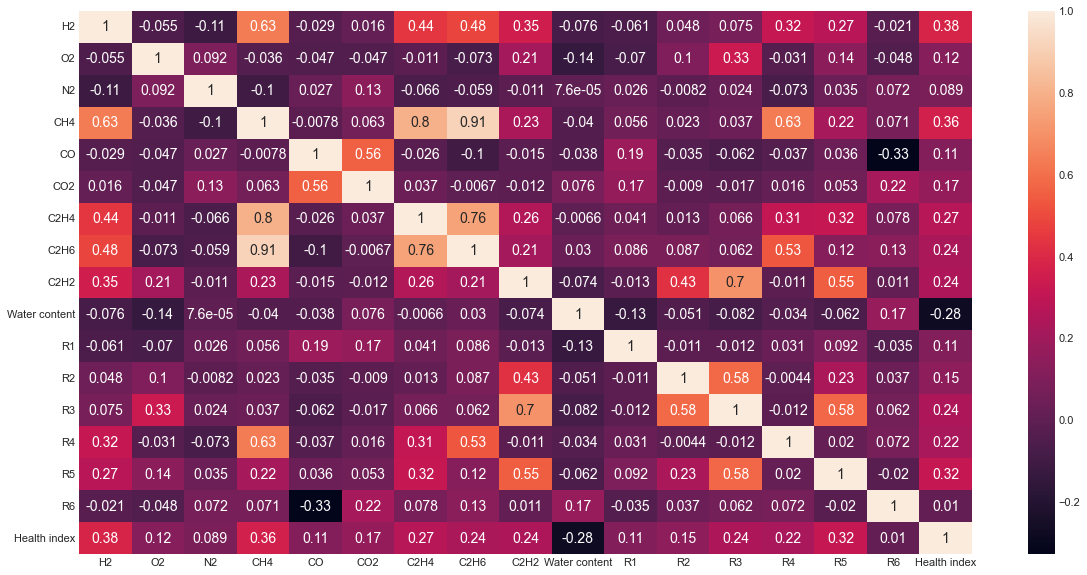

In [11]:
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
sns.heatmap(df_train[['H2', 'O2', 'N2', 'CH4', 'CO', 'CO2', 'C2H4', 'C2H6', 'C2H2',
        'Water content', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'Health index']].corr(), annot = True);

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   H2                   470 non-null    int64  
 1   O2                   470 non-null    int64  
 2   N2                   470 non-null    int64  
 3   CH4                  470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   C2H4                 470 non-null    int64  
 7   C2H6                 470 non-null    int64  
 8   C2H2                 470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    int

In [13]:
# Adjust column name
trainnig_data = df_train[['H2', 'O2', 'N2', 'CH4', 'CO', 'CO2', 'C2H4', 'C2H6', 'C2H2', 'Dielectric rigidity', 'Water content', 'Life expectation','Health index', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']]

In [14]:
#Save.
trainnig_data.to_csv('train.csv')